# Part 1: Simple Recommender System

## Section A: Introduction

▪ Recommender System refers to any system that recommends users objects (to purchase, to click on or to watch) which are attractive to them with a high probability.

▪ The ability to recommend relevant products or services to users can be a huge boost for a company.

▪ According to McKinsey, 75% of what people are watching on Netflix comes from recommendations.

▪ **(The reference of this practical)** https://www.datacamp.com/community/tutorials/recommender-systems-python

▪ **(Full dataset can be downloaded here)** https://www.kaggle.com/rounakbanik/the-movies-dataset?select=movies_metadata.csv

### Simple Movies Recommender

▪ They offer generalized recommendations to every user, based on any attribute that indicates popularity.

▪ The basic idea behind this system is that movies that are more popular and critically acclaimed will have a higher probability of being liked by the average audience. 

## Section B: Data Exploration

▪ The "movies_metadata.csv" file contains information about ~45,000 movies. 

▪ Features include posters, backdrops, budget, genre, revenue, release dates, languages, production countries, and companies.

### Data vs. Metadata

<img src="metadata.png" width="400">

▪ Data is recorded facts. 

▪ Metadata is simply data about data, or a description and context of the data.

### Loading Dataset into Dataframe

https://stackoverflow.com/questions/24251219/pandas-read-csv-low-memory-and-dtype-options

In [ ]:
import pandas as pd

movies_data = pd.read_csv('movies_metadata.csv')

In [ ]:
movies_data = pd.read_csv('movies_metadata.csv', low_memory = False)

In [ ]:
movies_data.shape

In [ ]:
movies_data.head(3)

### Retrieving All Columns' Names

In [ ]:
movies_data.columns

### Identifying the Best Indicator of Popularity

▪ One possible option is the **movie ranking**, for instance, **top 250 movies based on their respective ratings such as vote_average**. 

▪ The **sort_values()** function sorts the DataFrame by the specified label.

▪ Syntax: **sort_values(by, axis, ascending, inplace, kind, na_position, ignore_index, key)**

In [ ]:
movies_data.sort_values(by = ['vote_average'], ascending = False).head()

## Section C: Features Engineering

### Sorting a DataFrame by Multiple Columns

In [ ]:
movies_data.sort_values(by = ['vote_average', 'vote_count'], ascending = [False, False]).head()

### Focusing only on the Relevant Data

▪ Filter the dataframe down to the columns below:

\>>> original_title

\>>> vote_average

\>>> vote_count

In [ ]:
df_movies = movies_data[['original_title', 'vote_average', 'vote_count']]
df_movies

### Issue with Simple Rating?

▪ Even the **vote_average** for a movie is very high, but it can be contributed by a single vote from one user only.

### Weighted Rating

▪ A weighted rating that takes into account the average rating and the number of votes it has accumulated.

▪ We can use the following weighted rating formula as a metric:

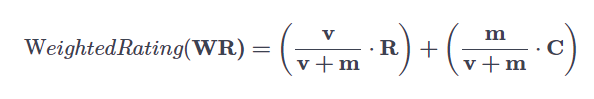

In the above equation,

\>>> **v** is the number of votes for the movie (represented by **vote_count**)

\>>> **m** is the **minimum of votes** required to be listed in the chart (to be calculated)

\>>> **R** is the average rating of the movie (represented by **vote_average**)

\>>> **C** is the **mean of average votes** across the whole report (to be calculated)

https://www.datacamp.com/tutorial/recommender-systems-python

### What is the Minimum Vote to be Considered?

▪ Suppose we want to use the 75th percentile as the number of minimum votes to be considered, then it means that for a movie to be featured in the charts, it must have more votes than at least 75% of the movies in the list (which is at least 34 votes).

### describe()

▪ Both the values of C and m can be viewed using describe().

▪ From the output, we can observe that the **average rating** of a movie is around 5.6 on a scale of 10, and the **75th percentile** is at least 34 votes.

https://www.datacamp.com/tutorial/recommender-systems-python

In [ ]:
df_movies.describe()

### mean()

▪ To calculate the value of the **mean rating across all movies**, we use the pandas .mean() function.

In [ ]:
# Calculate mean of vote average column
C = df_movies['vote_average'].mean()
C

### quantile()

▪ Suppose we want to consider the 90th percentile. 

▪ In other words, for a movie to be featured in the charts, it must have more votes than at least 90% of the movies on the list.

▪ To calculate the value of the 90th percentile, we use the pandas .quantile() function.

https://www.datacamp.com/tutorial/recommender-systems-python

In [ ]:
# Calculate the minimum number of votes required to be in the chart, m
m = df_movies['vote_count'].quantile(0.90) 
m

### List of Movies in the 90th Percentile

In [ ]:
# Extract all qualified movies into a new DataFrame
q_movies = df_movies.copy().loc[df_movies['vote_count'] >= m]
q_movies

In [ ]:
len(q_movies)

### Calculating the Weighted Rating Score (A New Feature)

▪ The formula of weighted rating is as follows:

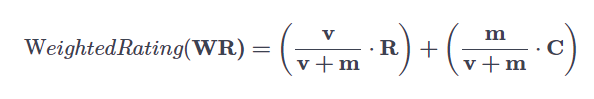

### apply()

▪ The apply() function is used to apply a function along an axis of the DataFrame.

▪ Objects passed to the function are Series objects whose index is either the DataFrame’s index (axis=0) or the DataFrame’s columns (axis=1).

\>>> 0 or 'index': apply function to each column.

\>>> 1 or 'columns': apply function to each row.

▪ It returns either a dataframe or a series, but it does not make changes to the original DataFrame object.

https://www.w3resource.com/pandas/dataframe/dataframe-apply.php

### Example

In [ ]:
df = pd.DataFrame([[9, 25]] * 3, columns=['P', 'Q'])
df

In [ ]:
import numpy as np

# The following code is the same as np.sqrt(df))
df.apply(np.sqrt)

<img src="exp1.png" width="400">

In [ ]:
df.apply(np.sum, axis=0)

<img src="exp2.png" width="400">

In [ ]:
df.apply(np.sum, axis=1)

<img src="exp3.png" width="400">

In [ ]:
# Function that computes the weighted rating of each movie
def weighted_rating(x, m = m, C = C):
    
    v = x['vote_count']
    R = x['vote_average']
    
    # Calculation based on the IMDB formula
    return (v / (v + m) * R) + (m / (m + v) * C)

In [ ]:
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)
q_movies['score'].head()

In [ ]:
q_movies.head()

## Section D: Recommending Top 20 Popular Movies

▪ Sort the DataFrame in descending order based on the score feature column and output the title, vote count, vote average, and weighted rating (score) of the top 20 movies.

In [ ]:
# Sort movies based on score calculated above
q_movies = q_movies.sort_values('score', ascending = False)

# Print the top 20 movies
q_movies.head(20)

▪ This chart shows the top 20 popular movies with high rating. 

▪ Simple recommender is suitable for new users who did not have any interaction history in the system.

## Section E: Exercise

▪ Assuming that a movie could be very popular if its revenue is high, then create a simple recommender system that recommends the top 25 popular movies based on this feature.